In [13]:
def fib(n):
    table = [0]*(n+1)
    table[1] = 1
    if n>=2:
        for i in range(2,n+1):
            table[i] = table[i-1]+table[i-2]
    return table[n]

In [18]:
preev,prev2 = 0,0
preev

0

In [23]:
%%time
fib(106)

Wall time: 1 ms


6356306993006846248183

In [19]:
def bestfib(n):
    if n<=1:
        return n
    prev,prev2 = 1,0
    for i in range(n+1):
        temp=prev
        prev +=prev2
        prev2 =temp
    return prev

In [24]:
%%time
fib(106)

Wall time: 0 ns


6356306993006846248183

## longest increasing subsequence

Input: An array A = [a0, a1, . . . , an−1].

Output: A longest increasing subsequence (LIS),
i.e., ai1
, ai2
, . . . , aik
such that
i1 < i2 < . . . < ik , ai1 < ai2 < · · · < aik
,
and k is maximal.

In [27]:
#without table
T = dict()
def lis(A,i):
    if i not in T:
        T[i]=1
    for j in range(i):
        if A[j]<A[i]:
            print('going to lis({}) '.format(j))
            T[i]=max(T[i],lis(A,j)+1)##if we wrote max(T[i],T[j]+1), we would have been gone gone gone
    return T[i]

In [43]:
%%time
A = [ 7 , 2 , 1 , 3 , 8 , 4 , 9 , 1 , 2 , 6 , 5 , 9 , 3]
print(max(lis(A,i) for i in range(len(A))))

going to lis(1) 
going to lis(2) 
going to lis(0) 
going to lis(1) 
going to lis(2) 
going to lis(3) 
going to lis(1) 
going to lis(2) 
going to lis(1) 
going to lis(2) 
going to lis(3) 
going to lis(1) 
going to lis(2) 
going to lis(0) 
going to lis(1) 
going to lis(2) 
going to lis(3) 
going to lis(1) 
going to lis(2) 
going to lis(4) 
going to lis(0) 
going to lis(1) 
going to lis(2) 
going to lis(3) 
going to lis(1) 
going to lis(2) 
going to lis(5) 
going to lis(1) 
going to lis(2) 
going to lis(3) 
going to lis(1) 
going to lis(2) 
going to lis(2) 
going to lis(7) 
going to lis(1) 
going to lis(2) 
going to lis(3) 
going to lis(1) 
going to lis(2) 
going to lis(5) 
going to lis(1) 
going to lis(2) 
going to lis(3) 
going to lis(1) 
going to lis(2) 
going to lis(7) 
going to lis(8) 
going to lis(2) 
going to lis(7) 
going to lis(1) 
going to lis(2) 
going to lis(3) 
going to lis(1) 
going to lis(2) 
going to lis(5) 
going to lis(1) 
going to lis(2) 
going to lis(3) 
going to lis(1

Crucial property: when computing T[i], T[j] for
all j < i have already been computed


In [41]:
#table and iteration runtime = O(n^2)
def listab(A):
    T = [None]*len(A)
    for i in range(len(T)):
        T[i]=1
        for j in range(i):
            if (A[j]<A[i]) and (T[i]<T[j]+1):
                T[i] = T[j]+1
    return (max(T[i] for i in range(len(A))))
#     return T

In [44]:
%%time
A = [ 7 , 2 , 1 , 3 , 8 , 4 , 9 , 1 , 2 , 6 , 5 , 9 , 3]
listab(A)

Wall time: 0 ns


### reconstructing a solution

How to reconstruct an optimal IS?

In order to reconstruct it, for each subproblem
we will keep its optimal value and a choice
leading to this value

i.e, remember the index of the prev number which is increasing the length at present index
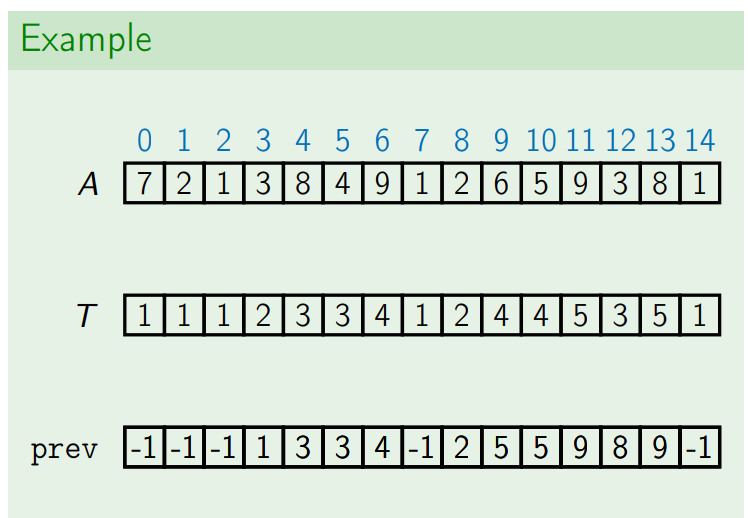

In [ ]:
#table and iteration runtime = O(n^2)
def lis1(A):
    T = [None]*len(A)
    prev = [None]*len(A)
    for i in range(len(T)):
        T[i]=1
        prev[i]=-1
        for j in range(i):
            if (A[j]<A[i]) and (T[i]<T[j]+1):
                T[i] = T[j]+1
                prev[i]=j
    return (max(T[i] for i in range(len(A))))
#     return T


In [52]:
def unwindsol(A):
    T = [None]*len(A)
    prev = [None]*len(A)
      for i in range(len(T)):
        T[i]=1
        prev[i]=-1
        for j in range(i):
            if (A[j]<A[i]) and (T[i]<T[j]+1):
                T[i] = T[j]+1
                prev[i]=j
    last = 0
    for i in range(1,len(A)):
        if T[i]>T[last]:
            last = i
    lis = []
    current = last
    while current>=0:
        lis.append(current)
        current = prev[current]
    lis.reverse()

    return list(A[i] for i in lis)

In [65]:
%%timeit
(unwindsol(A))

47.8 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [60]:
A.index?

In [59]:
[1,2,3].index(max([1,3,3,2]))

2

In [61]:
def unwindsol1(A):
    T = [None]*len(A)
    prev = [None]*len(A)
    for i in range(len(T)):
        T[i]=1
        prev[i]=-1
        for j in range(i):
            if (A[j]<A[i]) and (T[i]<T[j]+1):
                T[i] = T[j]+1
                prev[i]=j
    last = T.index(max(T))
    lis = [0]*max(T)
    current = last
    i = 0 
    while current >=0:
        lis[i] = current
        i+=1
        current = prev[current]
    lis.reverse()

    return list(A[i] for i in lis)

In [66]:
%%timeit
unwindsol1(A)  #actually this took more time unexpectedly, but the reason is finding max() and index of it is like calling twice O(2n), where as mechanical while 

48.6 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## edit distance

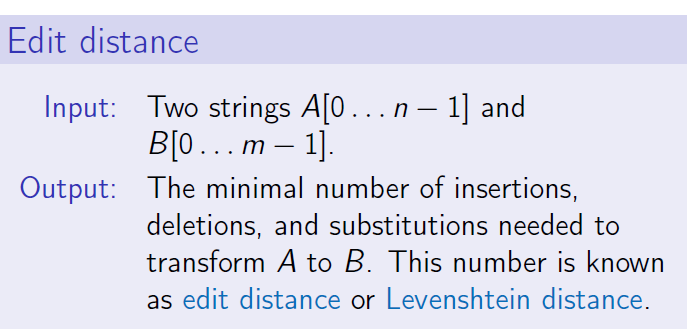

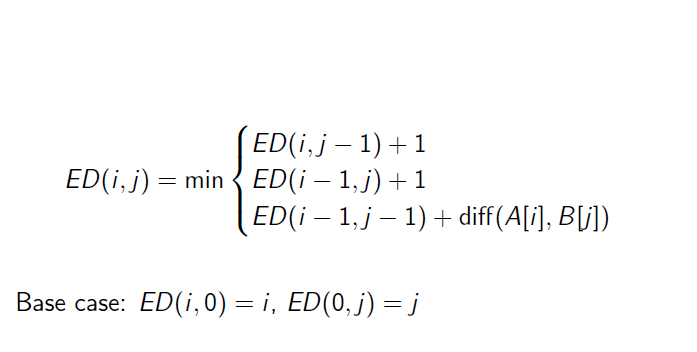

In [69]:
#recursive algo
def edit(a,b,i,j):
    T = dict()
    if not(i,j) in T:
        if i==0: 
            T[i,j] = j
        elif j==0:
            T[i,j]=i
        else:
            diff = 0 if a[i-1]==b[i-1] else 1
            T[i,j]= min(edit(a,b,i-1,j)+1,edit(a,b,i,j-1)+1,edit(a,b,i-1,j-1)+diff)
    return T[i,j]


In [70]:
%%time
edit('editing','distance',7,8)

Wall time: 300 ms


6

##### converting to iterative algo
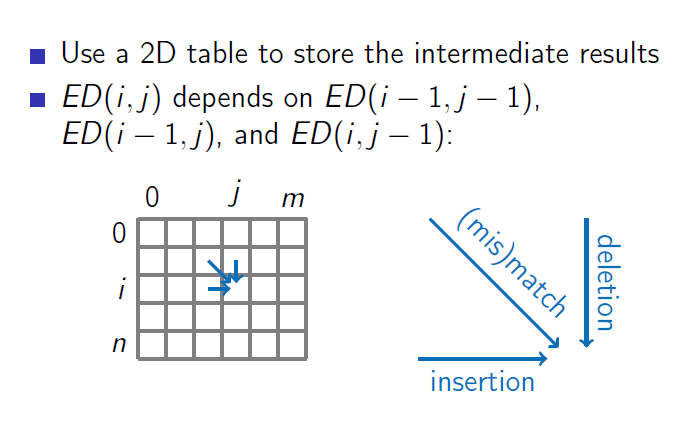

In [78]:
import numpy as np
print(np.nan==float('inf'))
print(np.nan == np.nan)
float('inf')+1

False
False


inf

In [87]:
#fill row by row or col by col
def edit1(a,b):
    T = [[float('inf')]*(len(b)+1) for i in range(len(a)+1)]   #key step. don't initialize with None's
    for i in range(len(a)+1):
        T[i][0]=i
    for j in range(len(b)+1):
        T[0][j]=j
    for i in range(1, len(a)+1):
        for j in range(1, len(b)+1):
            diff = 0 if (a[i-1]==b[j-1]) else 1    #why a[i-1]==b[j-1] not i and j? because max indeices of A and B are len(a)-1 and..
            T[i][j] = min(T[i-1][j]+1,T[i][j-1]+1,T[i-1][j-1]+diff)
    return T[len(a)][len(b)]
    

In [89]:
%%time
edit1('editing','distance')

Wall time: 0 ns


5

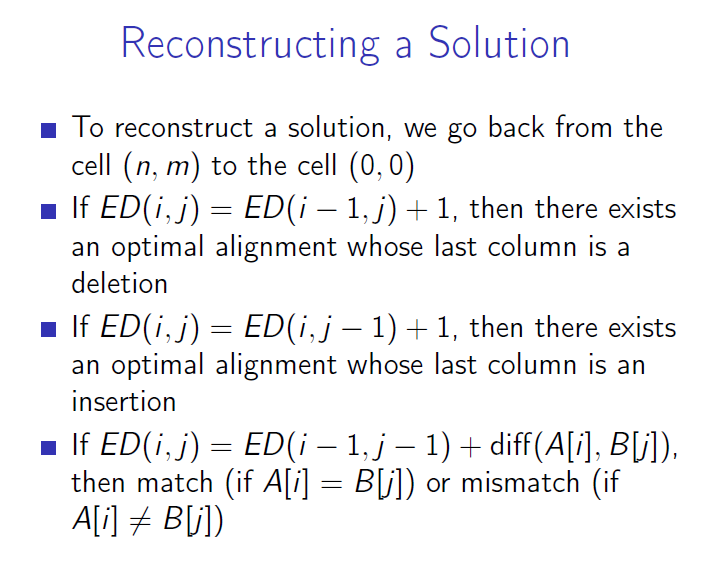

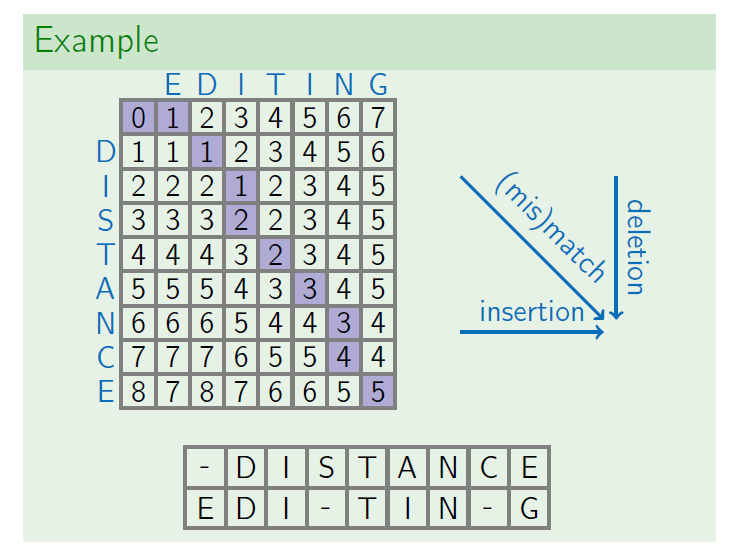

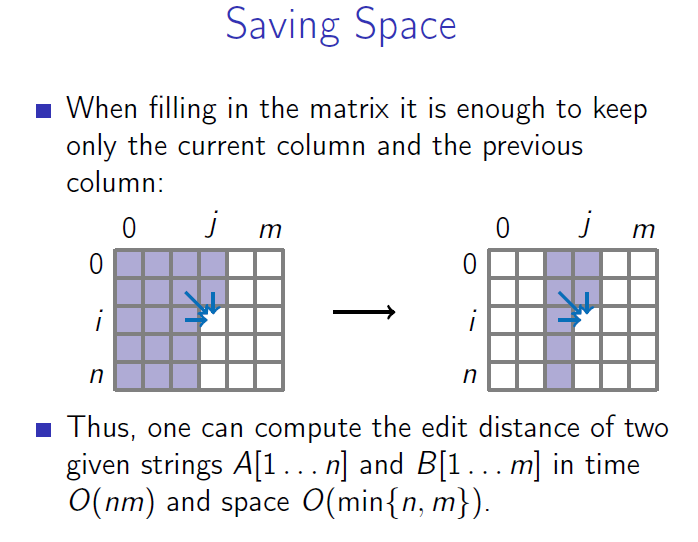

However we need the whole table to find an
actual alignment (we trace an alignment from
the bottom right corner to the top left corner)

There exists an algorithm constructing an
optimal alignment in time O(nm) and space
O(n + m) (Hirschberg’s algorithm)

## knapsack discrete
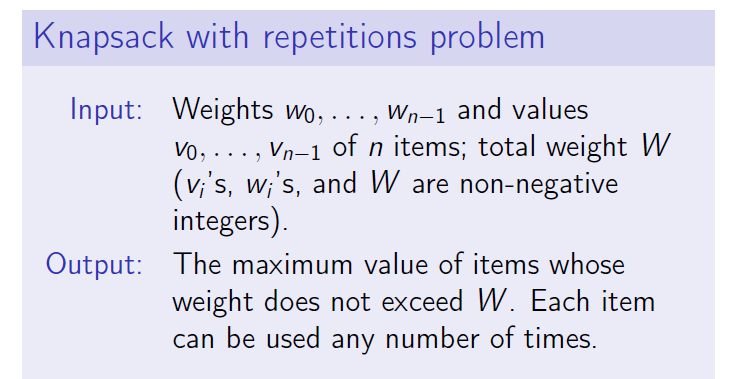

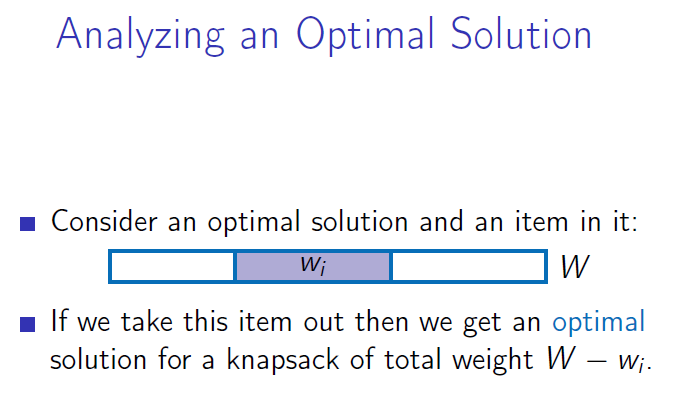

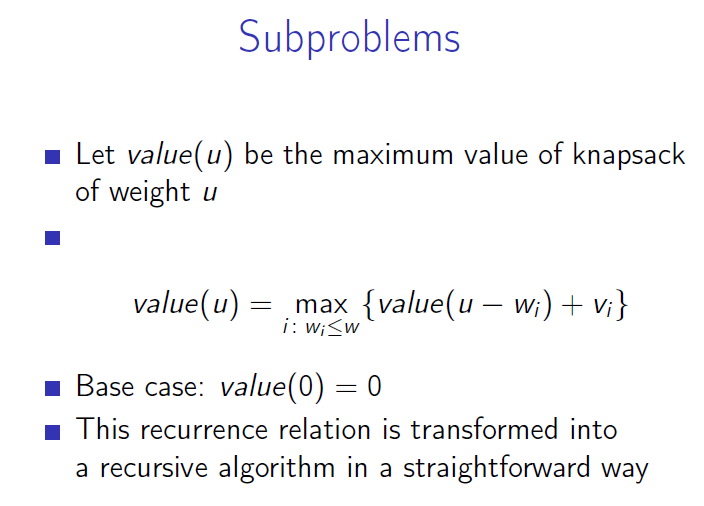

In [90]:
#recursive
def knapsackrec(w,v,cap):
    T = dict()
    if cap not in T:
        T[cap]=0
        for i in range(len(w)):
            if w[i]<=cap:
                T[cap] = max(T[cap],knapsackrec(w,v,cap-w[i])+v[i])
    return T[cap]
            

In [93]:
%%timeit
knapsackrec([6,3,4,2],[30,14,16,9],10)

170 µs ± 7.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [96]:
#iterativ
def knapsackite(w,v,cap):
    T = [0]*(cap+1)
    for i in range(1,cap+1):    #here the iteration order does not matter at all
        for j in range(len(w)):
            if w[j]<=i:
                T[i] = max(T[i],T[i-w[j]]+v[j])
    return T[cap]

In [97]:
%%timeit
knapsackite([6,3,4,2],[30,14,16,9],10)

35.4 µs ± 2.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


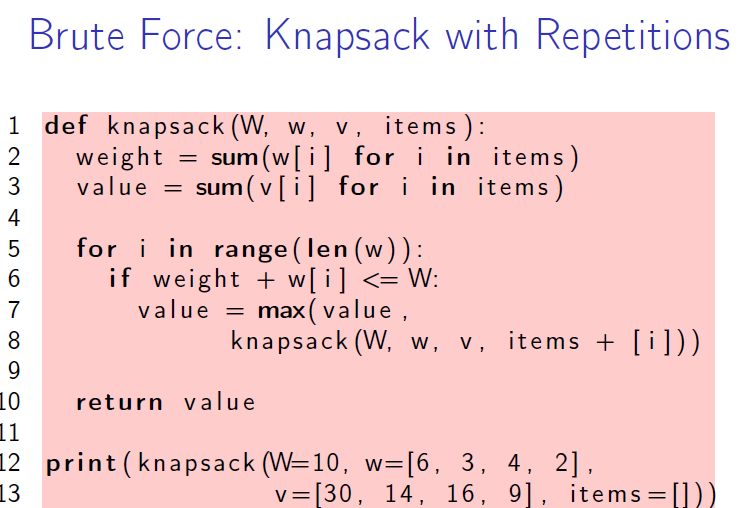

In [1]:
def knapsackbrute(W,w,v,items):
    weight = sum(w[i] for i in items)
    value = sum(v[i] for i in items)
    for i in range(len(w)):
        if weight+w[i]<=W:
            value = max(value,knapsackbrute(W,w,v,items+[i]))
    return value
print(knapsackbrute(10,[2,3],[14,18],items=[])) #expects 70

70


## knapsack with no reptitions

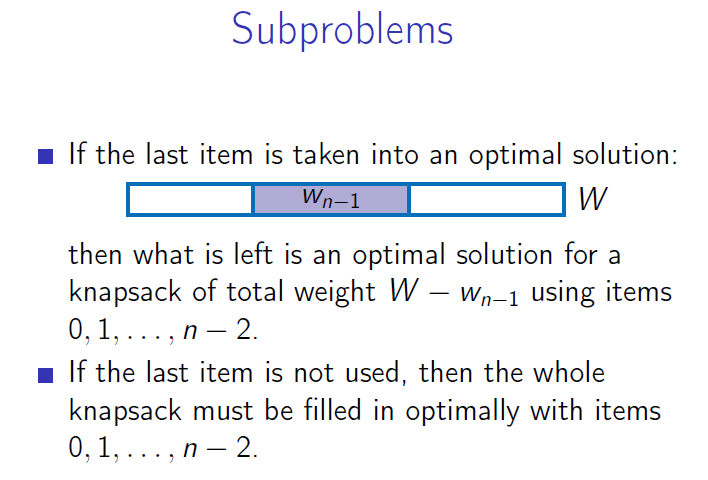

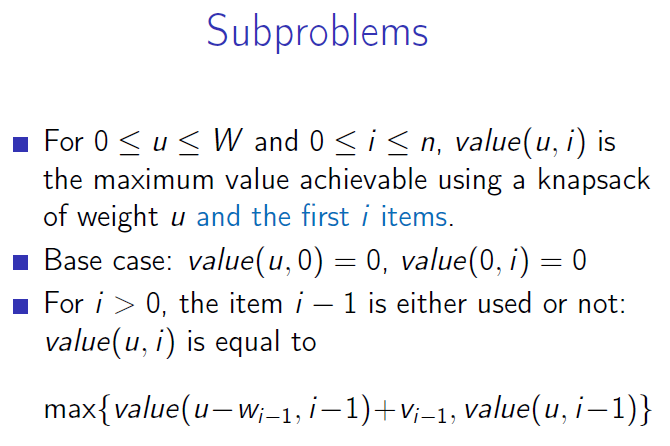

In [40]:
sum([1,2,3])

6

In [58]:
#iterative
def knapsck(W,w,v):
    if sum(w)<W:
        return sum(v)
    T = [[0]*(len(w)+1) for i in range(W+1)]
#     basecase
    for j in range(1,len(w)+1):
        for i in range(1,W+1):        
            if w[j-1]<=i:
#                 print(w[j-1],i,T[i][j-1],T[i-w[j-1]][j-2]+v[j-1])
                T[i][j] = max(T[i][j-1],T[i-w[j-1]][j-1]+v[j-1])
    return T[W][len(w)]

In [54]:
knapsck(10,[6,3,4,2],[26,12,20,16]) #expected 48

48

In [55]:
knapsck(10,[6,3,4,2],[30,14,16,9])

46

In [35]:
random.random?

In [38]:
import random
ok = random.randint(1,30)
for i in range(ok):
    W = random.randint(1,1000)
    T = random.randint(1,50)
    A = [random.randint(1,50) for i in range(T)]
    B = [random.randint(1,100) for i in range(T)]
    print(W,A,sum(A),B,knapsck(W,A,B),sep='\n')

629
[7, 6, 31, 20, 26, 10, 39, 37, 9, 33, 1, 18, 8, 17, 39, 21, 23, 29, 5, 4, 5, 2, 35, 29, 34, 44, 6, 8, 2, 48, 36, 5, 8, 13, 35, 46]
739
[27, 53, 55, 9, 78, 90, 6, 46, 7, 72, 6, 52, 94, 51, 54, 16, 37, 37, 74, 32, 44, 33, 61, 30, 14, 36, 33, 40, 87, 73, 34, 66, 73, 56, 82, 44]
977
7
[35, 21, 40, 19, 23, 7, 27, 35, 30, 11, 15, 9, 46, 10, 34, 31, 49, 14, 25, 19, 37, 47, 2, 8, 20, 43, 41, 24, 32, 7]
761
[29, 33, 37, 60, 43, 23, 49, 85, 52, 33, 36, 54, 25, 100, 32, 55, 85, 56, 58, 29, 50, 94, 10, 1, 100, 27, 72, 31, 95, 37]
37
782
[47, 2, 45, 28]
122
[72, 74, 55, 97]
171
564
[24, 16, 34, 6, 34, 18, 7, 25, 48, 11, 27, 21]
271
[27, 98, 56, 45, 3, 64, 36, 67, 40, 13, 27, 65]
352
136
[14]
14
[29]
261
65
[15, 24, 7, 48, 38, 47, 46, 5, 8, 11, 27, 28, 11, 12, 32, 29, 40, 9, 8, 36, 32, 40, 19, 6, 15, 14, 50, 34, 42, 18, 41, 14, 32, 4, 9]
851
[74, 2, 71, 44, 60, 20, 41, 44, 69, 12, 8, 33, 32, 70, 55, 60, 38, 59, 62, 54, 24, 58, 80, 86, 16, 23, 66, 66, 40, 48, 67, 76, 24, 39, 83]
370
528
[21, 3, 3

In [57]:
%%timeit
##without checking sum(w)<W
knapsck(782,[42,2,45,28],[100,200,300,400]) #expected 1000, but giving 600, I missed 400,now fixed it

4.76 ms ± 285 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [59]:
%%timeit
#with checking sum(w)<W
knapsck(782,[42,2,45,28],[100,200,300,400]) #expected 1000, but giving 600, I missed 400,fixed t

1.21 µs ± 28.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
